In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_validate
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv('cleaned_data (1)')
df.province.value_counts()

Bergamo     218
Brescia     172
Milano      131
Bolzano     115
Salerno     112
           ... 
Asti          2
Torino        1
Treviso       1
Vercelli      1
Aosta         1
Name: province, Length: 102, dtype: int64

In [5]:
df2=df
df2=df2.drop('region',axis=1)
df1=df2.groupby('province').count()
df1=df1.reset_index()
drop_province=df1[df1.name<50]
province=df1[df1.name>=50]
province=list(province.province)
drop_province=list(drop_province.province)
#df3[df3.province==province]
print(len(set(province)))
for i in drop_province:
  df2=df2.drop(df2.index[(df2["province"] == i)])
print(province)
df2.province.value_counts()
#df2.head()


29
['Avellino', 'Benevento', 'Bergamo', 'Biella', 'Bologna', 'Bolzano', 'Brescia', 'Caserta', 'Chieti', 'Como', 'Cosenza', 'Cremona', 'Imperia', 'Lecco', 'Mantova', 'Milano', 'Monza e della Brianza', 'Napoli', 'Padova', 'Pavia', 'Pordenone', 'Potenza', 'Roma', 'Salerno', 'Savona', 'Sondrio', 'Udine', 'Varese', 'Vicenza']


Bergamo                  218
Brescia                  172
Milano                   131
Bolzano                  115
Salerno                  112
Como                     106
Cremona                  102
Udine                    102
Varese                    99
Vicenza                   97
Pavia                     94
Lecco                     80
Napoli                    80
Avellino                  79
Caserta                   78
Roma                      70
Cosenza                   69
Chieti                    69
Biella                    64
Mantova                   63
Sondrio                   62
Padova                    60
Savona                    59
Benevento                 56
Bologna                   54
Monza e della Brianza     54
Potenza                   54
Imperia                   52
Pordenone                 50
Name: province, dtype: int64

In [6]:
df2.shape

(2501, 39)

In [7]:
df.shape

(4341, 40)

In [8]:
df2[df2['province']=='Benevento']
df2.head()


,Unnamed: 0,province,name,tc,cres,csor,istat,area,pop,alt,...,msw,sor,geo,roads,s_wteregio,s_landfill,gdp,proads,wage,finance
7,7,Roma,Fiumicino,229.050003,50.070000,135.720001,58120,213.889999,67626,1.0,...,33435410,76.39,2.0,329.0,11.051060,11.285970,7.570812,5.489089,9.470534,7.797937
9,9,Imperia,Riva Ligure,295.329987,35.529999,92.489998,8050,2.070000,2861,2.0,...,1553789,80.92,3.0,17.0,0.000000,16.863464,7.243186,5.126625,9.397199,7.460482
10,10,Padova,Correzzola,82.839996,26.660000,31.820000,28035,42.330002,5488,2.0,...,1626743,77.52,3.0,16.0,9.898176,11.296785,6.930928,5.782670,9.454921,7.138856
11,11,Savona,Borghetto Santo Spirito,411.790009,167.809998,54.470001,9012,5.390000,5154,2.0,...,4096059,54.77,3.0,22.0,0.000000,16.863464,8.220182,5.385746,9.455523,8.466788
14,14,Udine,Marano Lagunare,116.879997,63.730000,38.250000,30056,85.800003,1963,2.0,...,1000120,50.00,3.0,13.0,17.467550,4.897196,7.510346,4.941673,9.526180,7.735657


In [36]:
df.columns

Index(['region', 'province', 'name', 'tc', 'cres', 'csor', 'istat', 'area',
       'pop', 'alt', 'isle', 'sea', 'pden', 'wden', 'urb', 'fee', 'd_fee',
       'sample', 'organic', 'paper', 'glass', 'wood', 'metal', 'plastic',
       'raee', 'texile', 'other', 'msw_so', 'msw_un', 'msw', 'sor', 'geo',
       'roads', 's_wteregio', 's_landfill', 'gdp', 'proads', 'wage',
       'finance'],
      dtype='object')

In [9]:
numeric=list(df2.select_dtypes(include=[np.number]).columns.values)
numeric.remove('finance')

In [106]:
sc_X = StandardScaler()
sc_y = StandardScaler()
dict1={}
for i in province:
  print(i)
  df3=df2[df2['province']==i]
  #print(df3.isnull().sum())
  #print(df3.finance)
  #print(df3.shape)
  X=df3[numeric]
  #print(X.shape)
  X = sc_X.fit_transform(X)
  y=df3.finance
  #print(y.shape)
  X_train, X_test, y_train, y_test= train_test_split( X, y, test_size=0.2, random_state=42)
  lr = LinearRegression(fit_intercept=True,copy_X=True,normalize=True)
  lr_fit=lr.fit(X_train,y_train)
  y_predict=lr.predict(X_test)
  r2=lr.score(X_test, y_test)
  print(r2)
  dict1.update({i:r2})
print(dict1)

Avellino
0.9022460896431961
Benevento
-0.5121179405500678
Bergamo
0.9865062194655949
Biella
0.8781936321107501
Bologna
1.0
Bolzano
0.6594162119178382
Brescia
0.9969694441299766
Caserta
0.23369861718800944
Chieti
0.7484939077572674
Como
0.9809499373821634
Cosenza
0.9464960825659706
Cremona
0.989720743118384
Imperia
0.5948410637956375
Lecco
0.9706933395816388
Mantova
0.8583198678322428
Milano
0.9895530970460393
Monza e della Brianza
1.0
Napoli
0.9995594550998267
Padova
0.8273498015690253
Pavia
0.9201095786297417
Pordenone
1.0
Potenza
0.0034494965006708345
Roma


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

0.998839517495023
Salerno
0.8961488863600475
Savona
0.9929462162556568
Sondrio
0.9986990529080719
Udine
0.9996652658383197
Varese
0.9645453345788603
Vicenza
-196.50348218564744
{'Avellino': 0.9022460896431961, 'Benevento': -0.5121179405500678, 'Bergamo': 0.9865062194655949, 'Biella': 0.8781936321107501, 'Bologna': 1.0, 'Bolzano': 0.6594162119178382, 'Brescia': 0.9969694441299766, 'Caserta': 0.23369861718800944, 'Chieti': 0.7484939077572674, 'Como': 0.9809499373821634, 'Cosenza': 0.9464960825659706, 'Cremona': 0.989720743118384, 'Imperia': 0.5948410637956375, 'Lecco': 0.9706933395816388, 'Mantova': 0.8583198678322428, 'Milano': 0.9895530970460393, 'Monza e della Brianza': 1.0, 'Napoli': 0.9995594550998267, 'Padova': 0.8273498015690253, 'Pavia': 0.9201095786297417, 'Pordenone': 1.0, 'Potenza': 0.0034494965006708345, 'Roma': 0.998839517495023, 'Salerno': 0.8961488863600475, 'Savona': 0.9929462162556568, 'Sondrio': 0.9986990529080719, 'Udine': 0.9996652658383197, 'Varese': 0.96454533457886

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [99]:
dict1

{'Avellino': 0.9022460896431961,
 'Benevento': -0.5121179405500678,
 'Bergamo': 0.9865062194655949,
 'Biella': 0.8781936321107501,
 'Bologna': 1.0,
 'Bolzano': 0.6594162119178382,
 'Brescia': 0.9969694441299766,
 'Caserta': 0.23369861718800944,
 'Chieti': 0.7484939077572674,
 'Como': 0.9809499373821634,
 'Cosenza': 0.9464960825659706,
 'Cremona': 0.989720743118384,
 'Imperia': 0.5948410637956375,
 'Lecco': 0.9706933395816388,
 'Mantova': 0.8583198678322428,
 'Milano': 0.9895530970460393,
 'Monza e della Brianza': 1.0,
 'Napoli': 0.9995594550998267,
 'Padova': 0.8273498015690253,
 'Pavia': 0.9201095786297417,
 'Pordenone': 1.0,
 'Potenza': 0.0034494965006708345,
 'Roma': 0.998839517495023,
 'Salerno': 0.8961488863600475,
 'Savona': 0.9929462162556568,
 'Sondrio': 0.9986990529080719,
 'Udine': 0.9996652658383197,
 'Varese': 0.9645453345788603,
 'Vicenza': -196.50348218564744}

In [50]:
list1=list(dict1.keys())
print(len(list1))
list2=list(dict1.values())
list2

29


[0.8429504791608523,
 -0.6739047661787432,
 0.986216887119864,
 0.8825506173084274,
 1.0,
 0.6184166390020638,
 0.9962884942440592,
 0.2925478364290448,
 0.7826097826947578,
 0.9821200198271252,
 0.9510028445617108,
 0.9885566384636901,
 0.6314706289458369,
 0.9703987106184389,
 0.849749421300652,
 0.9999584771917329,
 1.0,
 0.9996218604503022,
 0.8002784977336299,
 0.9203211820277137,
 1.0,
 0.02168387781029335,
 0.9978574610217305,
 0.8985338500985859,
 0.9904453004318006,
 0.9985345799325462,
 0.9996666607396095,
 0.9886039104183261,
 -131.4809284363586]

In [62]:
labels1=list(df.fee.unique())
labels1

['PAYT', 'STANDARD']

In [12]:
df.d_fee.value_counts()

0    3784
1     557
Name: d_fee, dtype: int64

In [13]:
df=df.drop(['Unnamed: 0'],axis=1)

In [14]:
numeric=list(df.select_dtypes(include=[np.number]).columns.values)
numeric.remove('finance')

numeric

['tc',
 'cres',
 'csor',
 'istat',
 'area',
 'pop',
 'alt',
 'isle',
 'sea',
 'pden',
 'wden',
 'urb',
 'd_fee',
 'sample',
 'organic',
 'paper',
 'glass',
 'wood',
 'metal',
 'plastic',
 'raee',
 'texile',
 'other',
 'msw_so',
 'msw_un',
 'msw',
 'sor',
 'geo',
 'roads',
 's_wteregio',
 's_landfill',
 'gdp',
 'proads',
 'wage']

In [15]:
sc_X = StandardScaler()
sc_y = StandardScaler()

In [16]:
#print(X)
print(y.describe())

count    97.000000
mean      7.002821
std       0.464623
min       6.341816
25%       6.785701
50%       6.928113
75%       7.008478
max       9.812628
Name: finance, dtype: float64


In [17]:
X=df[numeric]
X = sc_X.fit_transform(X)
y=df['finance']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)
lr = LinearRegression(fit_intercept=True,copy_X= True,normalize= True)
lr_fit=lr.fit(X_train,y_train)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


In [18]:
y_predict=lr.predict(X_test)



In [19]:
y_predict.shape

(869,)

In [20]:
y_test

1022    7.789426
457     7.028382
2666    7.126703
17      7.834445
3933    8.271381
          ...   
3894    7.545520
2647    7.490262
416     6.747433
1618    7.223927
3519    8.076706
Name: finance, Length: 869, dtype: float64

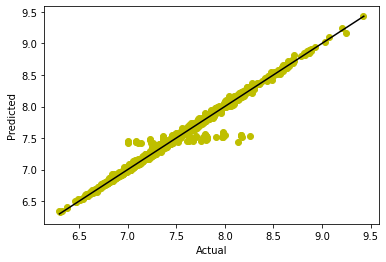

In [21]:
plt.xlabel('Actual');
plt.ylabel('Predicted');
plt.scatter(y_test,y_predict,c='y')
pl=max(max(y_predict), max(y_test))
po=min(min(y_predict), min(y_test))
plt.plot([pl,po],[pl,po],'black')

In [22]:
#labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
#df['Bridge_Types_Cat2'] = labelencoder.fit_transform(df['name'])
#df


In [38]:
len(numeric)

34

In [23]:
#X=df[]
lr

LinearRegression(normalize=True)

In [24]:
lr.score(X_train, y_train),lr.score(X_test, y_test)

(0.9682916975818715, 0.9645907123619344)

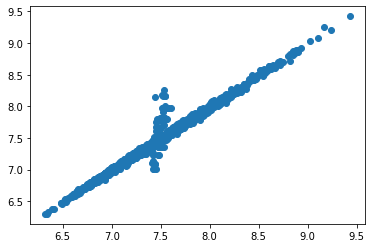

In [25]:
plt.scatter(y_predict,y_test)

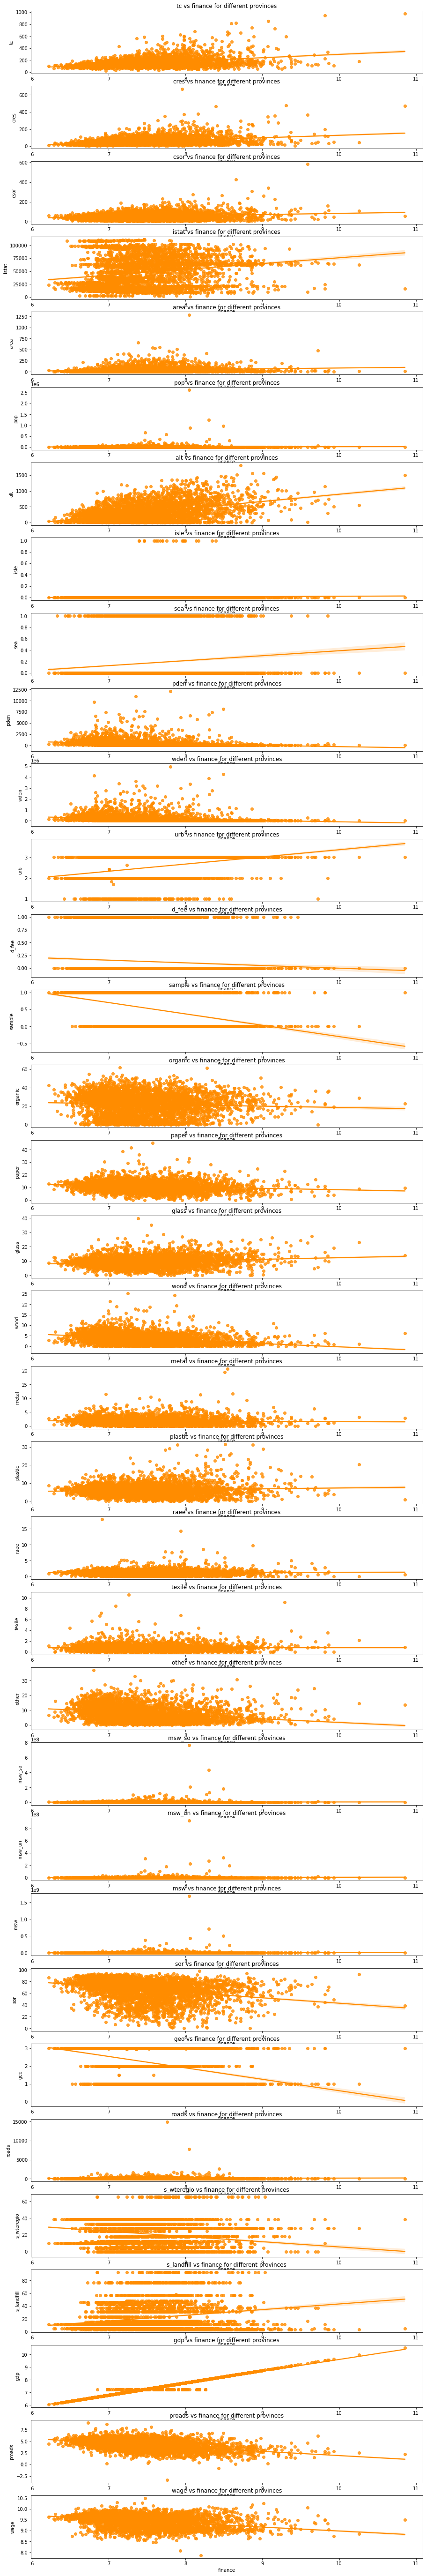

In [167]:
fig = plt.figure(figsize = (15, 100))
for i,col_name in enumerate(numeric):
    dict_df = {}
    temp_df = pd.DataFrame()
    plt.subplot(34,1,i+1)
    sns.regplot(x=df["finance"],y=df[col_name],color='darkorange') 
    plt.title(f'{col_name} vs finance for different provinces')
plt.show()

In [26]:
errors = abs(y_predict - y_test)

print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
mape = 100 * (errors / y_test)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
MSE = np.square(np.subtract(y_test,y_predict)).mean()
RMSE = math.sqrt(MSE)
RMSE = math.sqrt(MSE)
accuracy1=100*(1-RMSE)
print('MSE:',MSE)
print('RMSE:',RMSE)
print('r2:',1-RMSE)



Mean Absolute Error: 0.05 degrees.
MSE: 0.010093864101681106
RMSE: 0.10046822433825088
r2: 0.8995317756617491


In [27]:
cv=cross_validate(lr, X, y, cv=5)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

In [28]:
print('5 folds accuracy:',cv['test_score']*100)
print('mean accuracy of 5 folds:',cv['test_score'].mean()*100,'%')

5 folds accuracy: [96.22332942 96.57082115 97.21565823 95.4222234  94.17746794]
mean accuracy of 5 folds: 95.92190002788922 %


In [29]:
param_grid={'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [30]:
grid_search = GridSearchCV(estimator = lr, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [31]:
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


GridSearchCV(cv=3, estimator=LinearRegression(normalize=True), n_jobs=-1,
             param_grid={'copy_X': [True, False],
                         'fit_intercept': [True, False],
                         'normalize': [True, False]},
             verbose=2)

In [32]:
print ("r2 / variance : ",grid_search.best_score_)
print("Residual sum of squares: %.2f"
              % np.mean((grid_search.predict(X_test) - y_test) ** 2))

r2 / variance :  0.9665605343870692
Residual sum of squares: 0.01


In [33]:
grid_search.best_estimator_

LinearRegression(normalize=True)

In [34]:
grid_search.best_params_

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

In [66]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

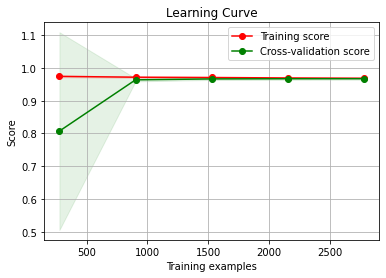

In [68]:
import scikitplot as skplt

skplt.estimators.plot_learning_curve(lr,X_train,y_train)


In [164]:
importance = lr.coef_
importance
lrcoef= pd.Series(importance,numeric)

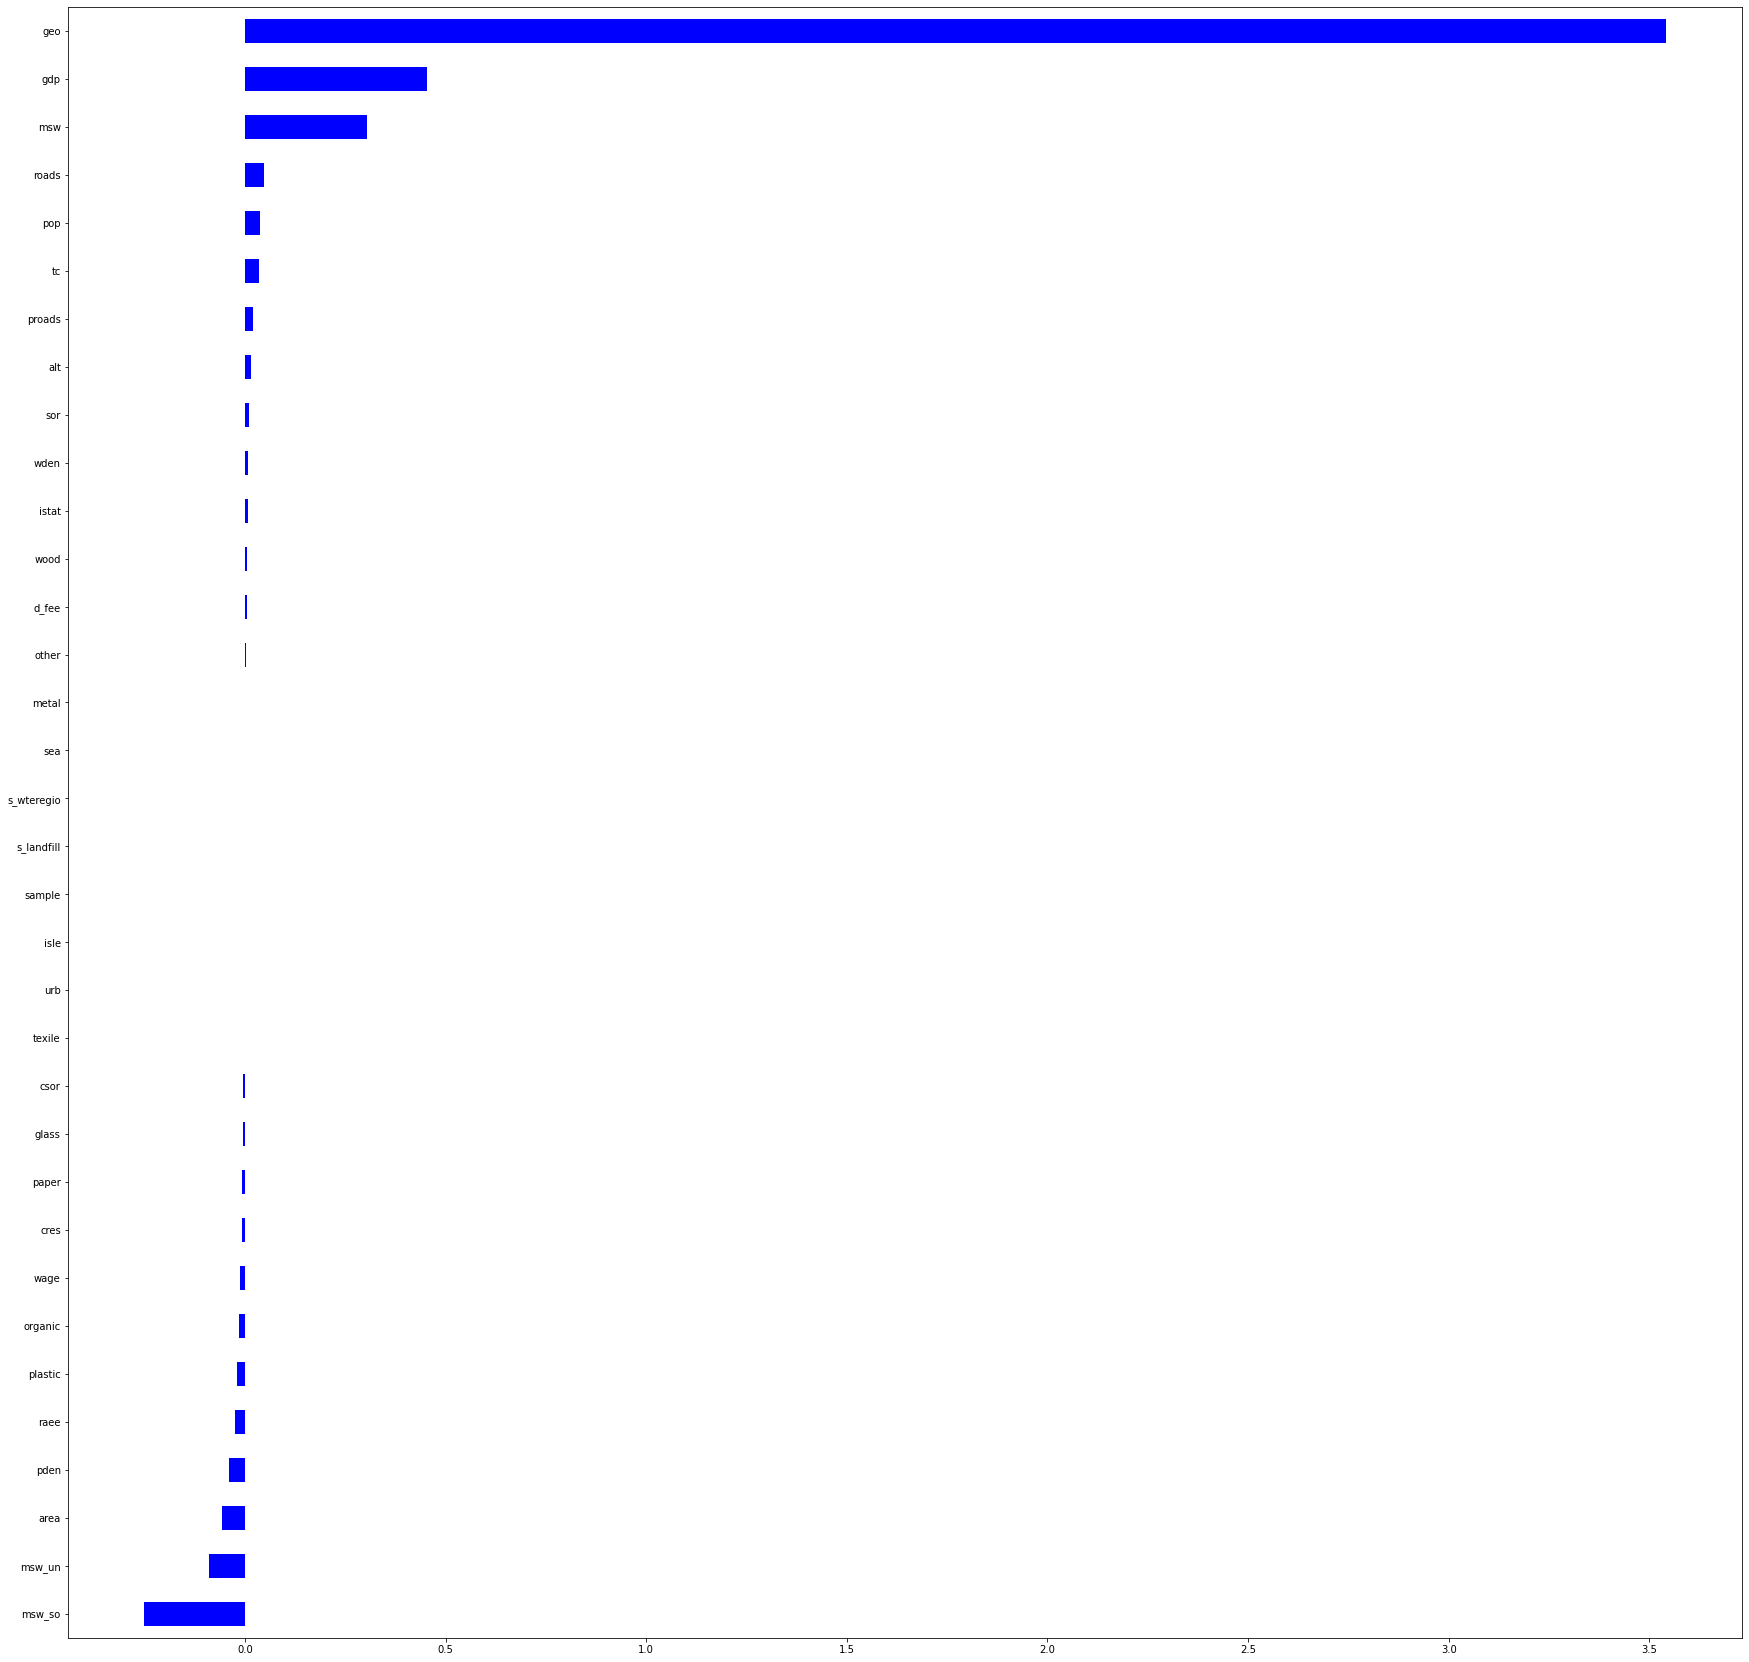

In [165]:
plt.rcParams["figure.figsize"] = (30, 30)
lrcoef.sort_values().plot.barh(color='b')

In [108]:
dict1

{'Avellino': 0.9022460896431961,
 'Benevento': -0.5121179405500678,
 'Bergamo': 0.9865062194655949,
 'Biella': 0.8781936321107501,
 'Bologna': 1.0,
 'Bolzano': 0.6594162119178382,
 'Brescia': 0.9969694441299766,
 'Caserta': 0.23369861718800944,
 'Chieti': 0.7484939077572674,
 'Como': 0.9809499373821634,
 'Cosenza': 0.9464960825659706,
 'Cremona': 0.989720743118384,
 'Imperia': 0.5948410637956375,
 'Lecco': 0.9706933395816388,
 'Mantova': 0.8583198678322428,
 'Milano': 0.9895530970460393,
 'Monza e della Brianza': 1.0,
 'Napoli': 0.9995594550998267,
 'Padova': 0.8273498015690253,
 'Pavia': 0.9201095786297417,
 'Pordenone': 1.0,
 'Potenza': 0.0034494965006708345,
 'Roma': 0.998839517495023,
 'Salerno': 0.8961488863600475,
 'Savona': 0.9929462162556568,
 'Sondrio': 0.9986990529080719,
 'Udine': 0.9996652658383197,
 'Varese': 0.9645453345788603,
 'Vicenza': -196.50348218564744}

In [138]:
dict_df = pd.DataFrame(list(dict1.items()),columns = ['column1','column2']) 
dict_df=dict_df.sort_values(by=['column2'])
dict_df=dict_df.tail(10)
dict_df

,column1,column2
11,Cremona,0.989721
24,Savona,0.992946
6,Brescia,0.996969
25,Sondrio,0.998699
22,Roma,0.998840
17,Napoli,0.999559
26,Udine,0.999665
4,Bologna,1.000000
16,Monza e della Brianza,1.000000
20,Pordenone,1.000000


Top 10 provinces r2 values using lr


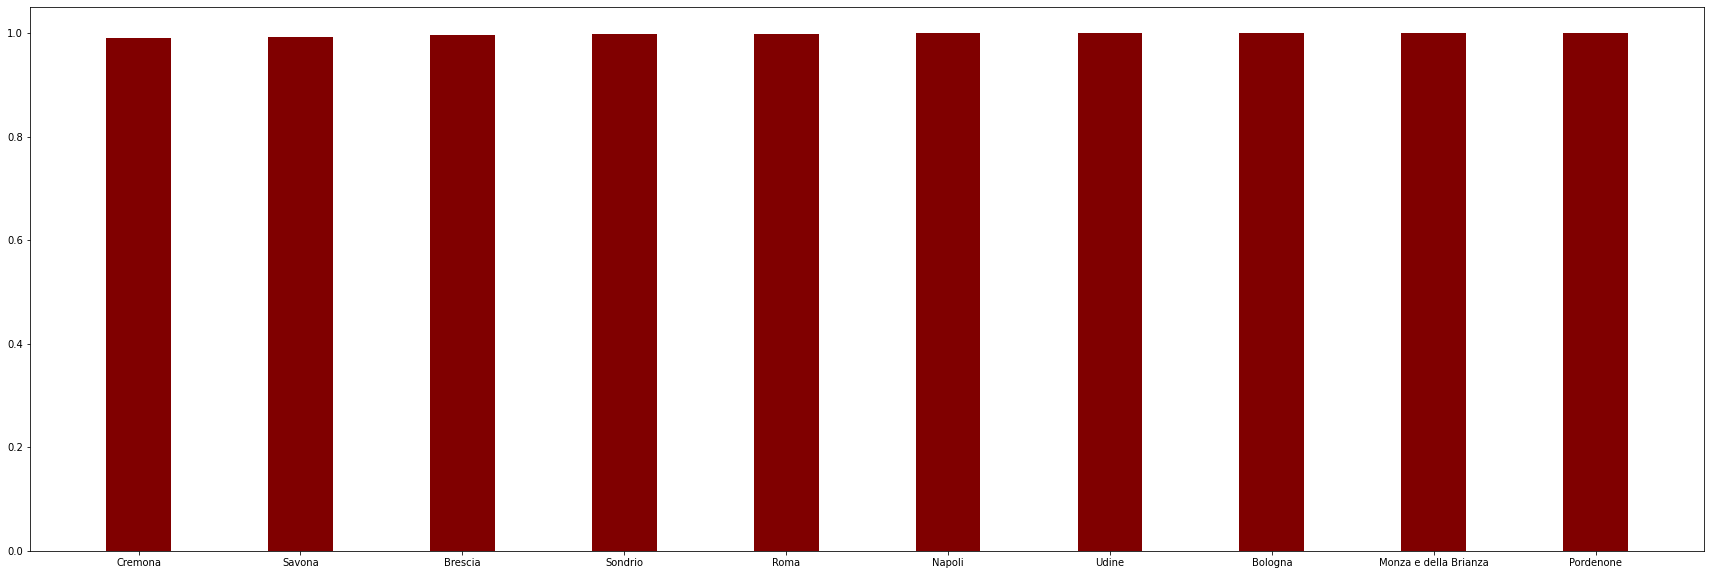

In [142]:
fig = plt.figure(figsize = (30, 10))
import matplotlib.pyplot as plt
import numpy as np

y = dict_df['column2']
mylabels = dict_df['column1']
plt.bar(mylabels, y, color ='maroon',
        width = 0.4)
plt.show()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pi

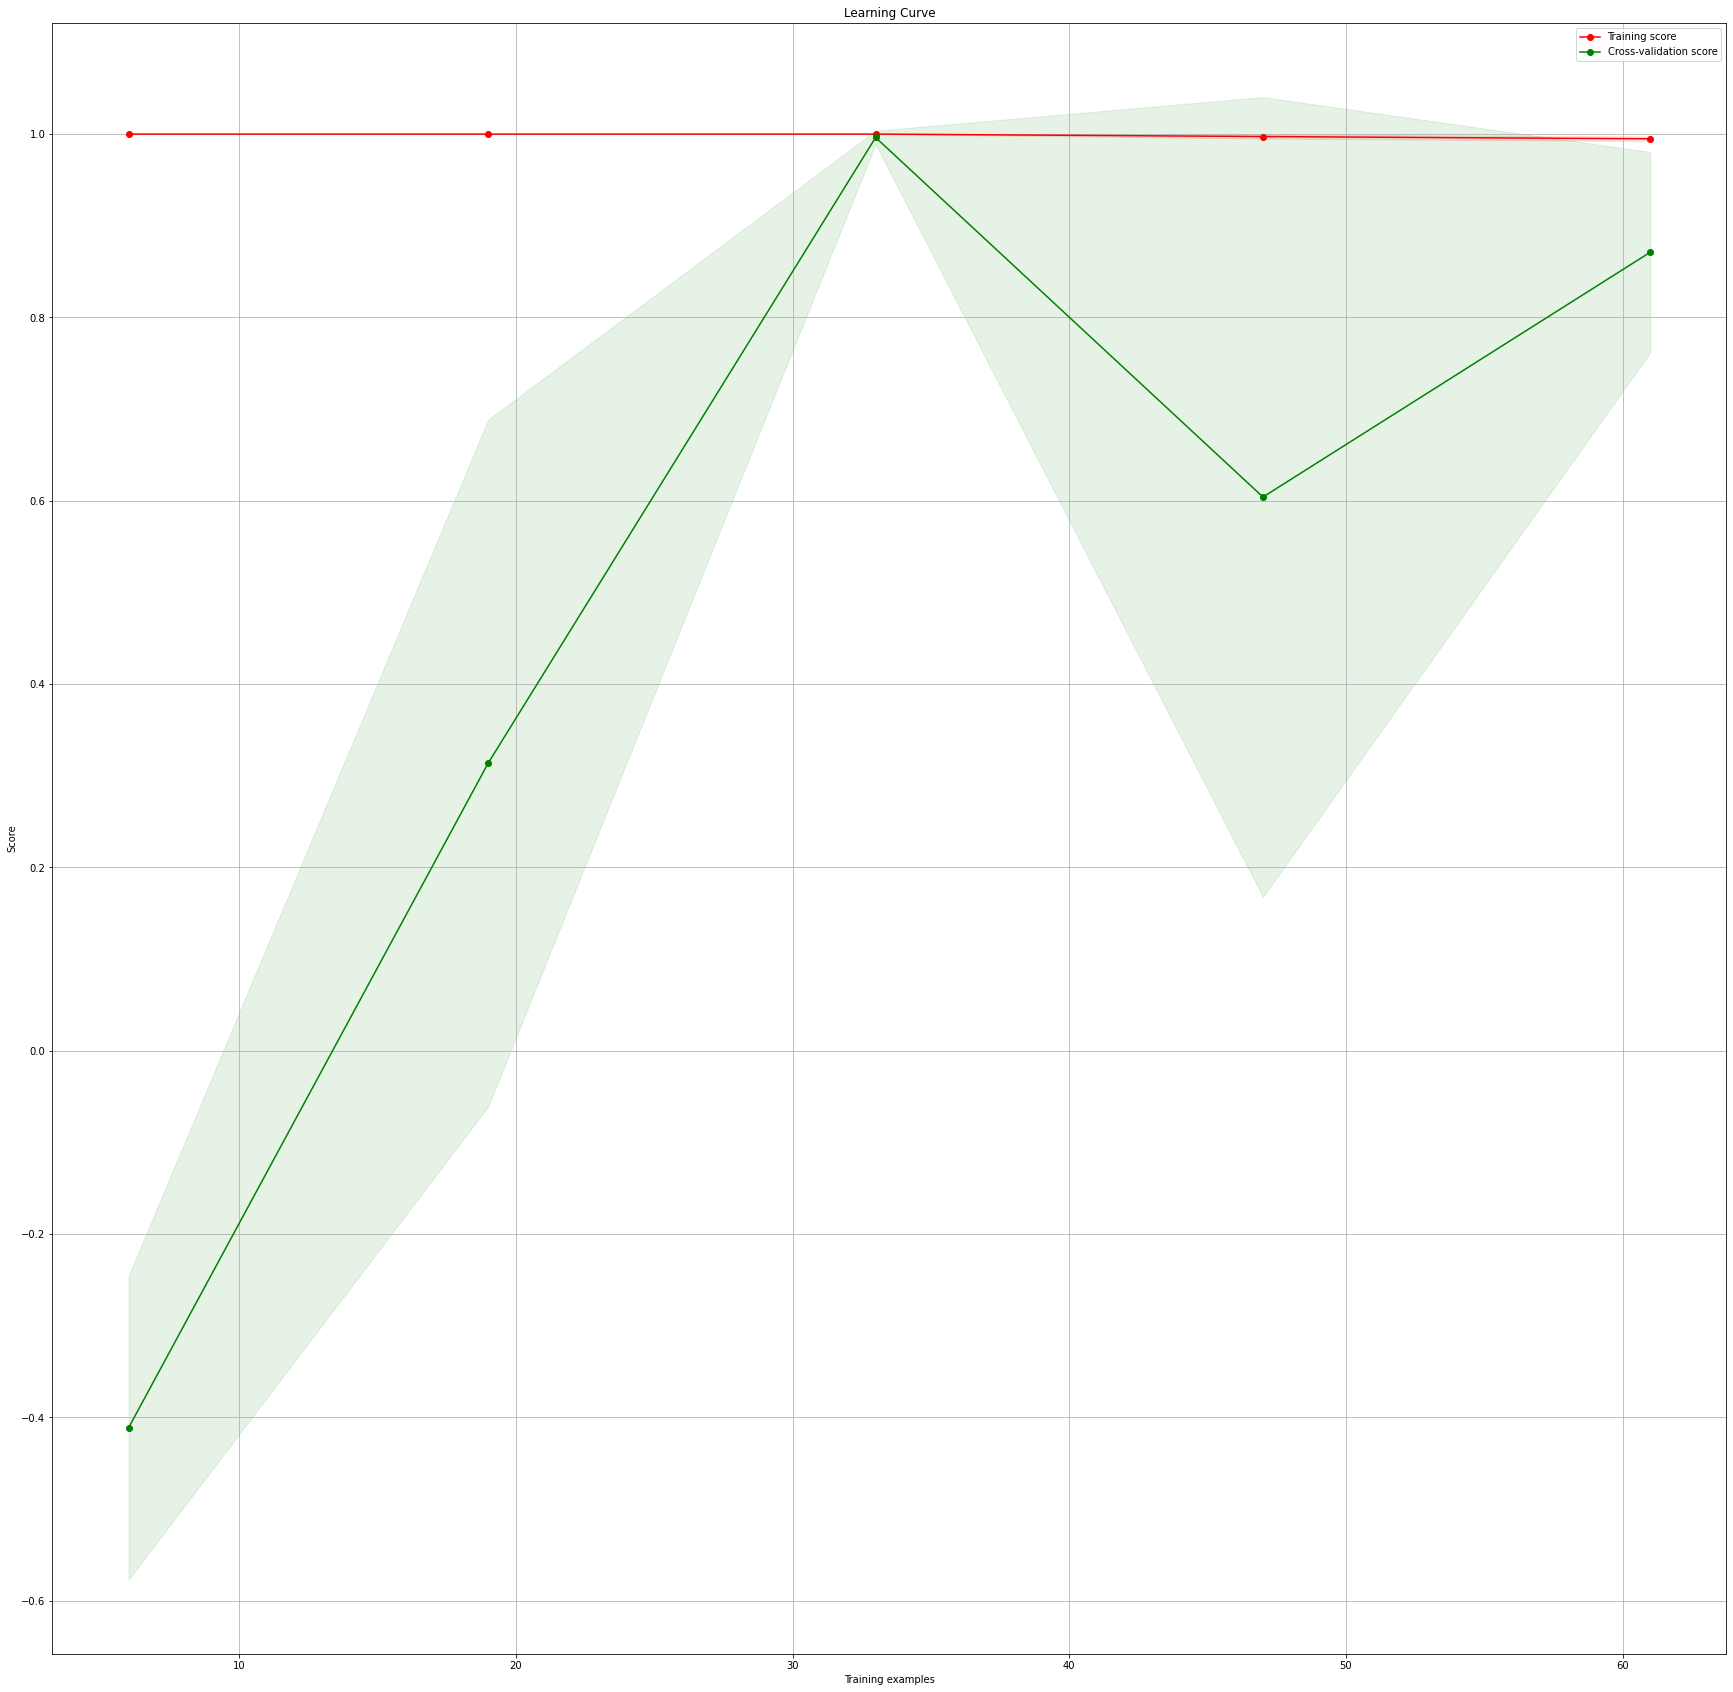

In [173]:
#pip install scikit-plot

import scikitplot as skplt
skplt.estimators.plot_learning_curve(lr,X_train,y_train)

In [171]:
pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
